# Geração de inputs e outputs

In [2]:
import os
import subprocess
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings 

warnings.filterwarnings('ignore')

In [3]:
main_dir = 'mains'
input_dir = 'inputs'
output_dir = 'outputs'

In [20]:
# Generate inputs
inputs = []
for i in range(10):
    num_films = str(1000 * (i + 1))
    for j in range(10):
        num_cats = str(j + 2)
        inputs.append(num_films + ' ' + num_cats) # Ex: 1000 2, 1000 3, ..., 10000 10
for input_params in inputs:
    input_path = os.path.join(input_dir, 'input_gen') # Ex: inputs/input_gen
    input_file = input_params.replace(' ', '_') + '.txt' # Ex: 1000_2.txt, 1000_3.txt, ..., 10000_10.txt
    input_args = input_params.split() # Ex: ['1000', '2'], ['1000', '3'], ..., ['10000', '10']
    with open(os.path.join(input_dir, input_file), 'w') as f:
        subprocess.run([input_path, *input_args], stdout=f)

# # # Run main program from mains with input from inputs and generate output to outputs
# root_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
# mains_path = os.path.join(root_dir, main_dir)
# for input in os.listdir(input_dir):
#     if input[0].isdigit():
#         main_path = os.path.join(main_dir, 'main_v1')
#         output_file = os.path.join(output_dir, "output_" + input)
#         with open(output_file, 'w') as g, open(os.path.join(input_dir, input_file), 'r') as f:
#             subprocess.run([main_path], stdin=f, stdout=g)

In [28]:
#Rodar no terminal para main_v1 (sem heurística)
with open(f"runScript/runScrip_v1.txt", "w") as output_file:
    for input in inputs:
        input_file = input.replace(' ', '_')
        output_file.write(f"mains/main_v1 < inputs/{input_file}.txt > outputs/v1/v1_output_{input_file}.txt\n")


In [29]:
#Rodar no terminal para main_v2 (com heurística de aleatoriedade)
with open(f"runScript/runScrip_v2.txt", "w") as output_file:
    for input in inputs:
        input_file = input.replace(' ', '_')
        output_file.write(f"mains/main_v2 < inputs/{input_file}.txt > outputs/v2/v2_output_{input_file}.txt\n")


In [4]:
df_v1 = pd.DataFrame(columns=['num_films', 'num_cats', 'num_films_allocated', 'screentime', 'runtime'])
v1_outputs = []
output_dir_v1 = output_dir + '/v1'
for output_file in os.listdir(output_dir_v1):
    with open(os.path.join(output_dir_v1, output_file), 'r') as f:
        output_data = f.read().splitlines()
        total_num_films, num_cats, num_films_allocated , screentime, runtime = output_data[0], output_data[1], output_data[2], output_data[3], output_data[4]
        #append the values as int and append to the list
        v1_outputs.append([int(total_num_films), int(num_cats), int(num_films_allocated), int(screentime), int(runtime)])
df_v1 = pd.DataFrame(v1_outputs, columns=['num_films', 'num_cats', 'num_films_allocated', 'screentime', 'runtime'])

df_v1 = df_v1.sort_values(by=['num_films', 'num_cats'], ascending=[True, True]).reset_index(drop=True)
df_v1.head(10)

,num_films,num_cats,num_films_allocated,screentime,runtime
0,1000,2,2,2,2632
1,1000,3,5,6,2674
2,1000,4,7,9,2977
3,1000,5,13,15,2948
4,1000,6,19,22,2979
5,1000,7,20,22,2630
6,1000,8,22,22,2619
7,1000,9,21,22,2395
8,1000,10,19,21,2404
9,1000,11,23,23,2503


In [5]:
df_v2 = pd.DataFrame(columns=['num_films', 'num_cats', 'num_films_allocated', 'screentime', 'runtime'])
v2_outputs = []
output_dir_v2 = output_dir + '/v2'
for output_file in os.listdir(output_dir_v2):
    with open(os.path.join(output_dir_v2, output_file), 'r') as f:
        output_data = f.read().splitlines()
        total_num_films, num_cats, num_films_allocated , screentime, runtime = output_data[0], output_data[1], output_data[2], output_data[3], output_data[4]
        #append the values as int and append to the list
        v2_outputs.append([int(total_num_films), int(num_cats), int(num_films_allocated), int(screentime), int(runtime)])
df_v2 = pd.DataFrame(v2_outputs, columns=['num_films', 'num_cats', 'num_films_allocated', 'screentime', 'runtime'])

df_v2 = df_v2.sort_values(by=['num_films', 'num_cats'], ascending=[True, True]).reset_index(drop=True)
df_v2.head(10)

,num_films,num_cats,num_films_allocated,screentime,runtime
0,1000,2,2,2,3011
1,1000,3,5,7,3015
2,1000,4,7,11,2952
3,1000,5,13,17,2991
4,1000,6,19,21,2741
5,1000,7,19,21,2645
6,1000,8,20,22,2457
7,1000,9,20,23,2409
8,1000,10,18,22,2233
9,1000,11,23,23,2244


In [6]:
df_v2.sort_values(by=['screentime'], ascending=[False]).reset_index(drop=True)

,num_films,num_cats,num_films_allocated,screentime,runtime
0,10000,11,23,23,18707
1,7000,7,23,23,12786
2,4000,10,23,23,7510
3,4000,11,23,23,7590
4,5000,6,23,23,9299
...,...,...,...,...,...
95,5000,2,4,4,9148
96,8000,2,4,4,15040
97,6000,2,3,3,11292
98,10000,2,3,3,18303


O código em questão tem como objetivo gerar inputs para dois programas diferentes (main_v1 e main_v2) e executá-los no terminal, registrando os outputs gerados em arquivos de texto. Em seguida, ele utiliza esses outputs para criar dois dataframes (df_v1 e df_v2) contendo informações sobre a alocação de filmes em salas de cinema.

O primeiro bloco de código é responsável por gerar os inputs para os programas main_v1 e main_v2. Ele cria uma lista de inputs, onde cada input é composto por um número de filmes e um número de categorias. Em seguida, ele cria um arquivo de texto para cada input gerado, usando o comando subprocess.run() para executar um arquivo de input_gen que recebe esses parâmetros.

Os próximos dois blocos de código usam os inputs gerados anteriormente para executar os programas main_v1 e main_v2, registrando os outputs em arquivos de texto. Cada arquivo de output gerado contém informações sobre a alocação de filmes em salas de cinema, como o número de filmes alocados, o tempo de exibição total, etc.

Finalmente, os dois últimos blocos de código utilizam os outputs gerados para criar dois dataframes (df_v1 e df_v2). Cada um desses dataframes possui informações sobre a alocação de filmes em salas de cinema, com colunas como o número total de filmes, o número de categorias, o número de filmes alocados, o tempo de exibição total, e o tempo de execução do programa. Esses dataframes são ordenados pelos valores de num_films e num_cats em ordem crescente.

# Heurística Gulosa

[Clique aqui para visualizar o código](mains/main_v1.cpp)

O código main_v1 implementa uma heurística gulosa para resolver um problema de agendamento de filmes. O objetivo é maximizar o número de filmes assistidos, dadas algumas restrições de horários e limites de quantidade por categoria. A entrada consiste em um inteiro N que representa o número de filmes disponíveis, seguido de N trios de inteiros que representam a hora de início, a hora de fim e a categoria de cada filme. Além disso, a entrada inclui um inteiro M que representa o número de categorias e uma lista de M inteiros que representam o número máximo de filmes que podem ser assistidos em cada categoria.

O código começa lendo os valores de N e M e cria vetores para armazenar informações sobre os filmes e o cronograma. Os filmes são armazenados como uma estrutura de dados Movie com campos para hora de início, hora de fim e categoria. Os horários são representados em horas do dia, variando de 0 a 23. Em seguida, o código lê os valores de maxQnt_per_category, que define o número máximo de filmes que podem ser assistidos em cada categoria, e os valores de cada filme, que são armazenados no vetor movies.

Os filmes são classificados em ordem crescente de tempo de término, usando a função sortByEndTime, que é passada para a função sort. Isso garante que os filmes mais cedo e mais curtos sejam considerados primeiro, e ajuda a maximizar o número de filmes assistidos. O código então percorre cada filme em ordem e verifica se ele pode ser adicionado ao cronograma. Se o filme começa depois de terminar ou se começa ao mesmo tempo que outro filme, ele é ignorado. Caso contrário, se o número atual de filmes da categoria do filme é menor do que o número máximo permitido, e se o filme não se sobrepõe a outro já agendado, ele é adicionado ao cronograma e os contadores de filmes por categoria e de tempo de tela são atualizados.

Finalmente, o código imprime o número de filmes que foram agendados, o tempo total de tela e o tempo de execução.Em resumo, o código implementa uma heurística gulosa para resolver um problema de agendamento de filmes. Ele classifica os filmes em ordem crescente de tempo de término, e depois itera pelos filmes e adiciona aqueles que não conflitam com outros já agendados e que não ultrapassam o limite de filmes por categoria.

___
## Resultados

Abaixo temos o resultado do valgrind para uma entrada de 10.000 filmes e 5 categorias

```
--------------------------------------------------------------------------------
-- User-annotated source: main_v1.cpp
--------------------------------------------------------------------------------
Ir      

-- line 7 ----------------------------------------
      .  using std::cout;
      .  using std::endl;
      .  using std::vector;
      .  
      .  struct Movie {
      .      int start, end, category;
      .  };
      .  
122,486  bool sortByEndTime(const Movie& a, const Movie& b) {
367,518      return a.end < b.end; // Sort by end time in ascending order
122,486  }
      .  
     11  int main() {
      2      auto start_time = std::chrono::high_resolution_clock::now();
    950  => ???:0x0000000000109120 (1x)
      .  
      .      // Variables
      .      int n, m;
      2      int screenTime = 0;
      1      int ans = 0;
      .  
      .      // Read the number of movies and categories
      3      cin >> n;
  7,591  => ???:0x0000000000109160 (1x)
      3      cin >> m;
    998  => ???:0x0000000000109160 (1x)
      .  
      .      // Create the movies vector and the schedule vector
      1      vector<Movie> movies(n);
      2      vector<int> maxQnt_per_category(m); // Maximum number of movies of category i that can be displayed
      .  
      7      vector<int> currentQnt_per_category(m, 0); //
    258  => /usr/include/c++/9/bits/stl_vector.h:std::vector<int, std::allocator<int> >::vector(unsigned long, int const&, std::allocator<int> const&) (1x)
      6      vector<int> schedule(23, 0); // 24 hours in a day (0-23)
    281  => /usr/include/c++/9/bits/stl_vector.h:std::vector<int, std::allocator<int> >::vector(unsigned long, int const&, std::allocator<int> const&) (1x)
      .  
      .      // Read the number of movies of each category
     22      for (int i=0; i < m; i++)
     13          cin >> maxQnt_per_category[i];
  3,992  => ???:0x0000000000109160 (4x)
      .      
      .      // Read the movies
 40,006      for (int i = 0; i < n; i++) 
 90,001          cin >> movies[i].start >> movies[i].end >> movies[i].category;
32,673,451  => ???:0x0000000000109160 (30,000x)
      .  
      .      // Sort the movies by end time in ascending order
      .      sort(movies.begin(), movies.end(), sortByEndTime);
      .  
      .      // Print number of movies and categories
      4      cout << n << endl;
  7,594  => ???:0x00000000001091e0 (1x)
      4      cout << m << endl;
    405  => ???:0x00000000001091e0 (1x)
      .  
      .      // For each movie, check if it can be added to the schedule
 40,005      for (int i = 0; i < n; i++) {
 10,000          int start = movies[i].start;
 10,000          int end = movies[i].end;
 11,452          int category = movies[i].category - 1;
      .  
 20,000          if (start >= end) { // If the movie starts after it ends, it is not valid
      .              continue;
      .          }
 34,565          else if (schedule[start+1] == 1) { // If the movie starts at the same time as another movie, it is not valid
      .              continue;
      .          }
 22,906          if (currentQnt_per_category[category] < maxQnt_per_category[category]) { // If the movie is of a category that has not reached its limit
    600              if (schedule[start] == 0 && schedule[end] == 0) { // and if the movie does not overlap with another movie, add it to the schedule
     27                  for (int j = start; j < end; j++) // add the movie to the schedule
     18                      schedule[j] = 1;
      9                  currentQnt_per_category[category]++;
      9                  ans++;
     36                  screenTime += end - start;      
      .              } 
      .          }
      .      }
      4      cout << ans << endl;
    405  => ???:0x00000000001091e0 (1x)
      4      cout << screenTime << endl;
    405  => ???:0x00000000001091e0 (1x)
      .  
      1      auto stop_time = std::chrono::high_resolution_clock::now();
     40  => ???:0x0000000000109120 (1x)
      .      auto duration = std::chrono::duration_cast<std::chrono::microseconds>(stop_time - start_time); //µs
      .      cout << duration.count() << endl;
      .  
      .      // Outputs order
      .      // 1. Number of movies
      .      // 2. Number of categories
      .      // 3. Number of movies allowed to be displayed
      .      // 4. Total screen time
      .      // 5. Execution time
      .      return 0;
     15  }
```     

Vamos analizar o tempo de execução (`screentime`) da versão gulosa para os nossos inputs. É de se esperar que com o aumento de inputs, o tempo de execução aumente, idependente do número de categorias. 

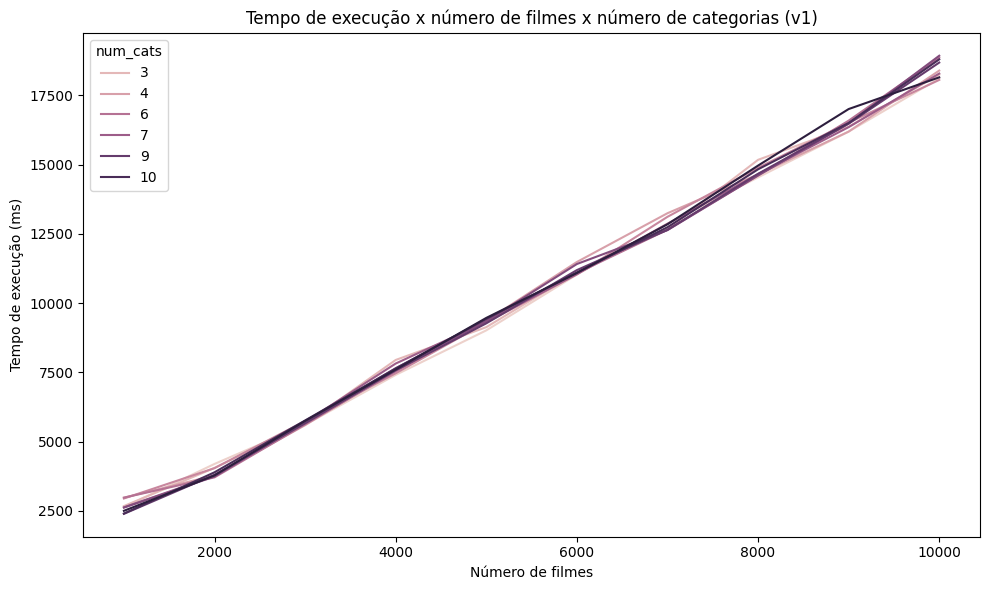

In [7]:
#Plotar gráfico de tempo de execução x número de filmes x número de categorias (v1)
plt.figure(figsize=(10, 6))
sns.lineplot(x="num_films", y="runtime", hue="num_cats", data=df_v1)
plt.title("Tempo de execução x número de filmes x número de categorias (v1)")
plt.xlabel("Número de filmes")
plt.ylabel("Tempo de execução (ms)")
plt.tight_layout()  
plt.show()


In [8]:
#describe no tempo de execução
df_v1["runtime"].describe()

count      100.000000
mean     10281.420000
std       5131.307473
min       2395.000000
25%       5696.250000
50%      10248.000000
75%      14658.000000
max      18928.000000
Name: runtime, dtype: float64

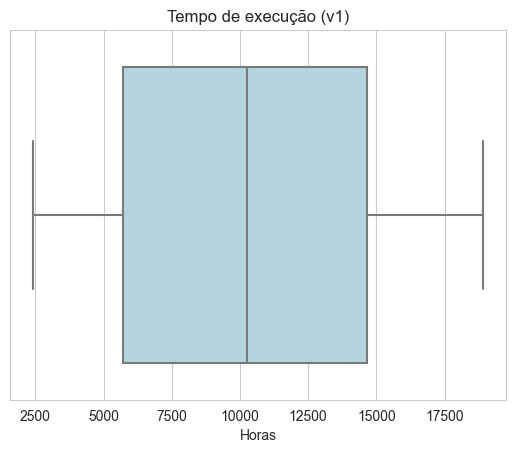

In [9]:
# definir estilo do gráfico
sns.set_style("whitegrid")

# criar boxplot e adicionar títulos e rótulos
ax = sns.boxplot(x=df_v1['runtime'], color='lightblue')
ax.set_title("Tempo de execução (v1)")
ax.set_xlabel("Horas")

# adicionar pontos para os outliers
outliers = df_v1[df_v1['runtime'] > df_v1['runtime'].quantile(0.75) + 1.5*(df_v1['runtime'].quantile(0.75) - df_v1['runtime'].quantile(0.25))]
for i, outlier in outliers.iterrows():
    ax.plot(1, outlier['runtime'], 'ro', markersize=8)

# mostrar gráfico
plt.show()

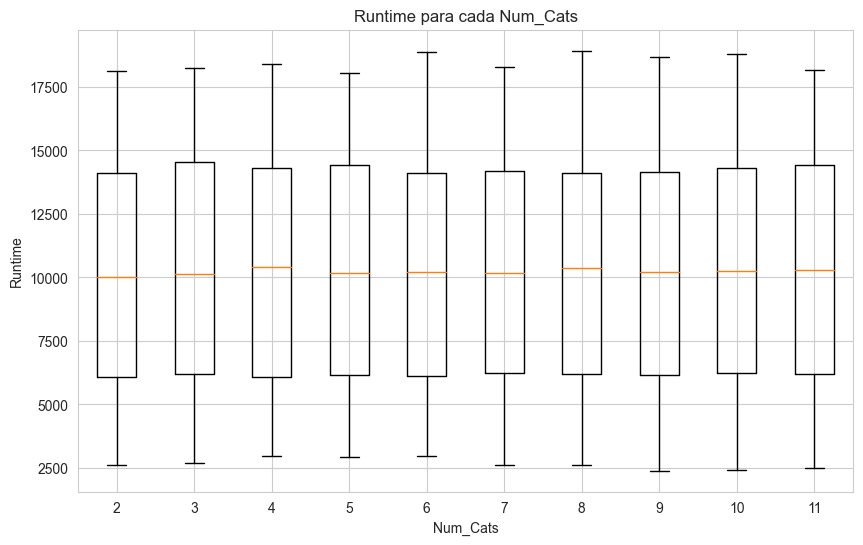

In [16]:
# Agrupe o dataframe por num_cats e selecione a coluna screentime
grouped = df_v1.groupby('num_cats')['runtime']

# Crie o boxplot
plt.figure(figsize=(10,6))
plt.boxplot([grouped.get_group(num_cat) for num_cat in grouped.groups.keys()])
plt.xlabel('Num_Cats')
plt.ylabel('Runtime')
plt.title('Runtime para cada Num_Cats')

# Adicione rótulos personalizados para cada boxplot
labels = grouped.groups.keys()
plt.xticks(range(1, len(labels) + 1), labels)

plt.show()

Podemos observar que de fato, ao aumentar o número de filmes, o tempo de execução aumenta proporcionalmente. O interessante é que podemos observar que o ao mudar o número de categorias, a performance em tempo de execução se mantém ao longo dos número de filmes, confirmando a nossa hipótese.

Vamos analisar agora o tempo de tela (`screentime`).

In [10]:
#describe no screentime
df_v1["screentime"].describe()

count    100.000000
mean      16.990000
std        7.517649
min        2.000000
25%        9.750000
50%       22.000000
75%       23.000000
max       23.000000
Name: screentime, dtype: float64

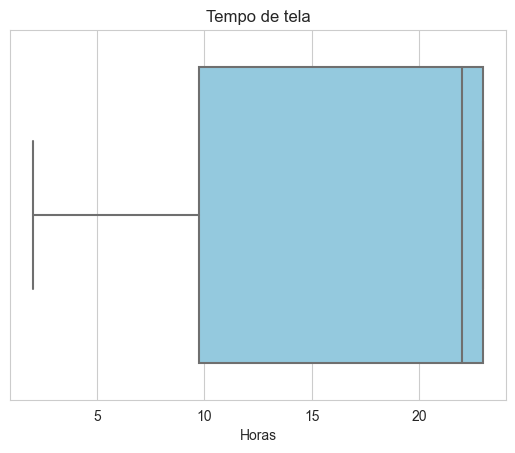

In [11]:
# definir estilo do gráfico
sns.set_style("whitegrid")

# criar boxplot e adicionar títulos e rótulos
ax = sns.boxplot(x=df_v1['screentime'], color="skyblue")
ax.set_title("Tempo de tela")
ax.set_xlabel("Horas")

# adicionar pontos para os outliers
outliers = df_v1[df_v1['screentime'] > df_v1['screentime'].quantile(0.75) + 1.5*(df_v1['screentime'].quantile(0.75) - df_v1['screentime'].quantile(0.25))]
for i, outlier in outliers.iterrows():
    ax.plot(1, outlier['screentime'], 'ro', markersize=8)

# mostrar gráfico
plt.show()

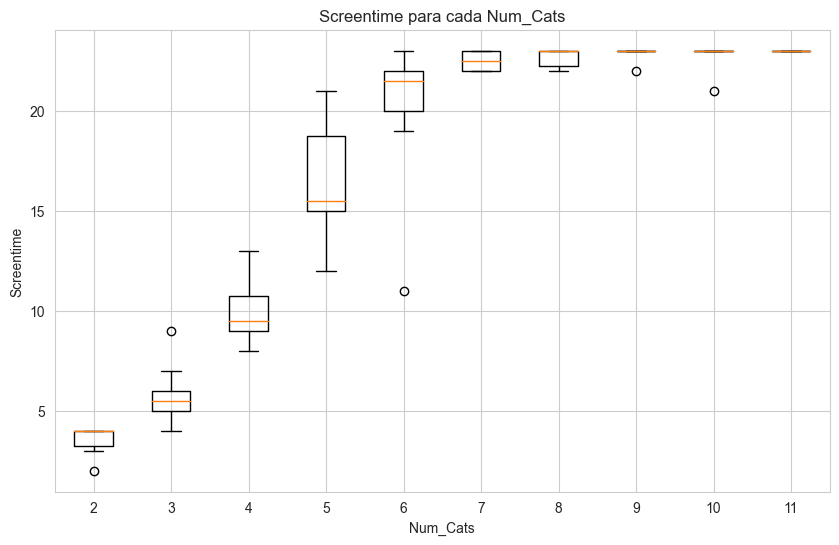

In [12]:
# Agrupe o dataframe por num_cats e selecione a coluna screentime
grouped = df_v1.groupby('num_cats')['screentime']

# Crie o boxplot
plt.figure(figsize=(10,6))
plt.boxplot([grouped.get_group(num_cat) for num_cat in grouped.groups.keys()])
plt.xlabel('Num_Cats')
plt.ylabel('Screentime')
plt.title('Screentime para cada Num_Cats')

# Adicione rótulos personalizados para cada boxplot
labels = grouped.groups.keys()
plt.xticks(range(1, len(labels) + 1), labels)

plt.show()

# Implementação da aleatoriedade

Essa implementação consiste na adaptação da heurística gulosa de nosso projeto. A proposta é a modificação heurística gulosa de modo que ao longo da seleção de um filme tenha 25% de chance de pegar outro filme qualquer que respeite o horário. Isso faz com que a heurística tenha um pouco mais de exploration e possamos ter alguns resultados melhores.

Vamos repetir as mesmas análises para o segundo approach.

___
## Resultados

Abaixo temos o resultado do valgrind para uma entrada de 10.000 filmes e 4 categorias

```
--------------------------------------------------------------------------------
-- User-annotated source: main_v2.cpp
--------------------------------------------------------------------------------
Ir      

-- line 8 ----------------------------------------
      .  using std::cout;
      .  using std::endl;
      .  using std::vector;
      .  
      .  struct Movie {
      .      int start, end, category;
      .  };
      .  
122,486  bool sortByEndTime(const Movie& a, const Movie& b) {
367,518      return a.end < b.end; // Sort by end time in ascending order
122,486  }
      .  
     11  int main() {
      2      auto start = std::chrono::high_resolution_clock::now();
    950  => ???:0x0000000000109120 (1x)
      .  
      .      // Variables
      .      int n, m;
      2      int ans = 0;
      2      int screenTime = 0;
      .  
      .      // Read the number of movies and categories
      3      cin >> n;
  7,591  => ???:0x0000000000109160 (1x)
      3      cin >> m;
    998  => ???:0x0000000000109160 (1x)
      .  
      .      // Create the movies vector and the schedule vector
      1      vector<Movie> movies(n);
      2      vector<int> maxQnt_per_category(m); // qnt_per_category[i] = qnt of movies of category 
      7      vector<int> currentQnt_per_category(m, 0); //
    258  => /usr/include/c++/9/bits/stl_vector.h:std::vector<int, std::allocator<int> >::vector(unsigned long, int const&, std::allocator<int> const&) (1x)
      7      vector<int> schedule(23, 0); // 24 hours in a day (0-23)
    281  => /usr/include/c++/9/bits/stl_vector.h:std::vector<int, std::allocator<int> >::vector(unsigned long, int const&, std::allocator<int> const&) (1x)
      .  
      .      // Read the number of movies of each category
     22      for (int i=0; i < m; i++)
     13          cin >> maxQnt_per_category[i];
  3,992  => ???:0x0000000000109160 (4x)
      .      
      .      // Read the movies
 40,006      for (int i = 0; i < n; i++) 
 90,001          cin >> movies[i].start >> movies[i].end >> movies[i].category;
32,673,451  => ???:0x0000000000109160 (30,000x)
      .  
      .      // Sort the movies by end time in ascending order
      .      sort(movies.begin(), movies.end(), sortByEndTime);
      .  
      .      // Print number of movies and categories
      4      cout << n << endl;
  7,594  => ???:0x00000000001091e0 (1x)
      4      cout << m << endl;
    405  => ???:0x00000000001091e0 (1x)
      .  
      .      // Create random number generator
      .      std::default_random_engine generator;
      2      generator.seed(std::chrono::system_clock::now().time_since_epoch().count()); // seed the generator with the current time
     40  => ???:0x0000000000109120 (1x)
      .  
      .      // Create uniform distribution for choosing a random movie
      3      std::uniform_int_distribution<int> movieDist(0, n-1);
      .  
      .      // Create uniform distribution for generating a random number between 0 and 99
      .      std::uniform_int_distribution<int> randDist(0, 99);
      .  
      .      // For each movie, check if it can be added to the schedule
 40,004      for (int i = 0; i < n; i++) {
      .          int rand_i, start, end, category;
      .  
 20,000          if (randDist(generator) < 25) { // If the random number is 0 (25% chance), choose a random movie
      .              int rand_i = movieDist(generator); // Generate a normalized random number between 0 and n
  4,768              start = movies[rand_i].start;
  2,384              end = movies[rand_i].end;
  7,152              category = movies[rand_i].category - 1;
      .          } else {
  7,616              start = movies[i].start;
  7,616              end = movies[i].end;
 15,232              category = movies[i].category - 1;
      .          }
 20,000          if (start >= end) { // If the movie starts after it ends, it is not valid
      .              continue;
      .          }
 43,225          else if (schedule[start+1] == 1) { // If the movie starts at the same time as another movie, it is not valid
      .              continue;
      .          }
  6,575          if (currentQnt_per_category[category] < maxQnt_per_category[category]) { // If the movie is of a category that has not reached its limit
    243              if (schedule[start] == 0 && schedule[end] == 0) { // and if the movie does not overlap with another movie, add it to the schedule
     50                  for (int j = start; j < end; j++) // add the movie to the schedule
     27                      schedule[j] = 1;
      9                  currentQnt_per_category[category]++;
      9                  ans++; 
     27                  screenTime += end - start;     
      .              } 
      .          }
      .      }
      4      cout << ans << endl;
    405  => ???:0x00000000001091e0 (1x)
      4      cout << screenTime << endl;
    425  => ???:0x00000000001091e0 (1x)
      .  
      1      auto stop = std::chrono::high_resolution_clock::now();
     40  => ???:0x0000000000109120 (1x)
      .      auto duration = std::chrono::duration_cast<std::chrono::microseconds>(stop - start); //µs
      .      cout << duration.count() << endl;
      .  
      .      // Outputs order
      .      // 1. Number of movies
      .      // 2. Number of categories
      .      // 3. Number of movies allowed to be displayed
      .      // 4. Total screen time
      .      // 5. Execution time
      .      return 0;
     15  }
```     

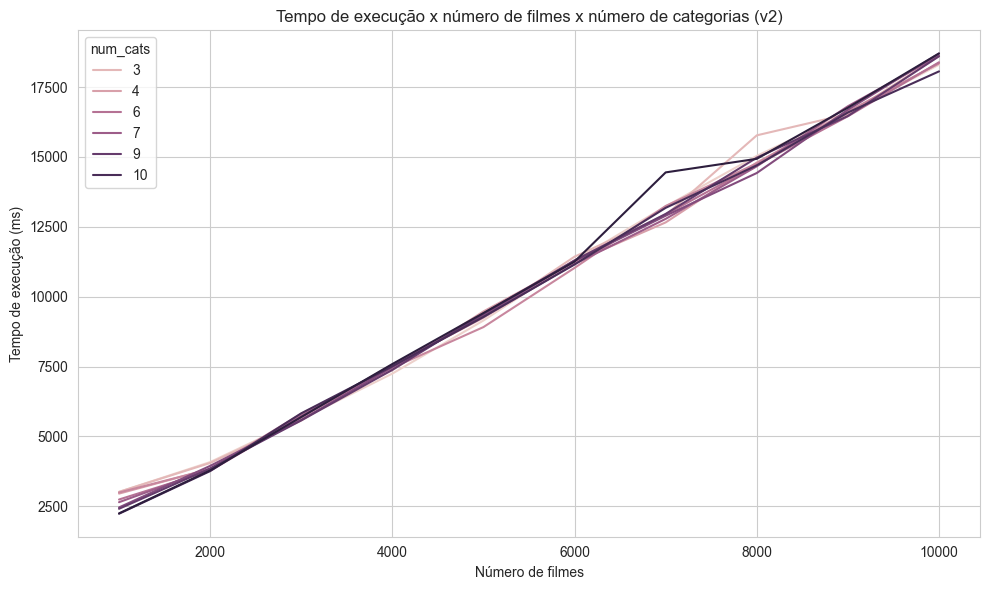

In [13]:
#Plotar gráfico de tempo de execução x número de filmes x número de categorias (v1)
plt.figure(figsize=(10, 6))
sns.lineplot(x="num_films", y="runtime", hue="num_cats", data=df_v2)
plt.title("Tempo de execução x número de filmes x número de categorias (v2)")
plt.xlabel("Número de filmes")
plt.ylabel("Tempo de execução (ms)")
plt.tight_layout()  
plt.show()


In [14]:
#describe no tempo de execução
df_v2["runtime"].describe()

count      100.000000
mean     10330.780000
std       5192.164105
min       2233.000000
25%       5690.500000
50%      10252.000000
75%      14779.500000
max      18707.000000
Name: runtime, dtype: float64

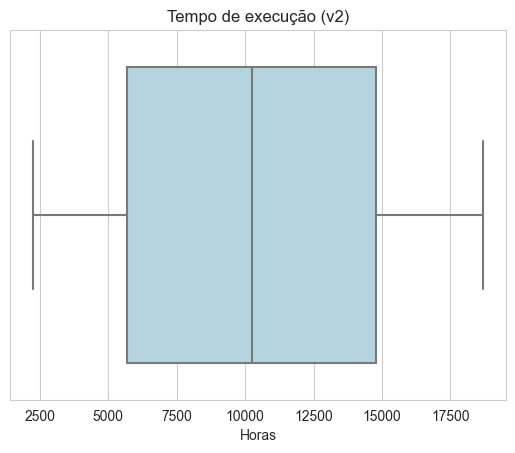

In [15]:
# definir estilo do gráfico
sns.set_style("whitegrid")

# criar boxplot e adicionar títulos e rótulos
ax = sns.boxplot(x=df_v2['runtime'], color='lightblue')
ax.set_title("Tempo de execução (v2)")
ax.set_xlabel("Horas")

# adicionar pontos para os outliers
outliers = df_v2[df_v2['runtime'] > df_v2['runtime'].quantile(0.75) + 1.5*(df_v2['runtime'].quantile(0.75) - df_v2['runtime'].quantile(0.25))]
for i, outlier in outliers.iterrows():
    ax.plot(1, outlier['runtime'], 'ro', markersize=8)

# mostrar gráfico
plt.show()

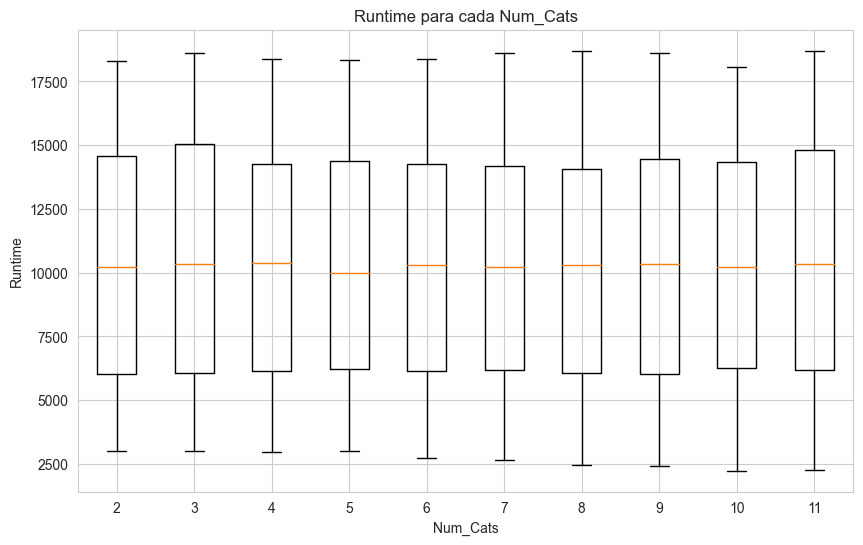

In [17]:
# Agrupe o dataframe por num_cats e selecione a coluna screentime
grouped = df_v2.groupby('num_cats')['runtime']

# Crie o boxplot
plt.figure(figsize=(10,6))
plt.boxplot([grouped.get_group(num_cat) for num_cat in grouped.groups.keys()])
plt.xlabel('Num_Cats')
plt.ylabel('Runtime')
plt.title('Runtime para cada Num_Cats')

# Adicione rótulos personalizados para cada boxplot
labels = grouped.groups.keys()
plt.xticks(range(1, len(labels) + 1), labels)

plt.show()

Analisando agora o `screentime`

In [18]:
#describe no screentime
df_v2["screentime"].describe()

count    100.000000
mean      17.160000
std        7.484287
min        2.000000
25%       10.000000
50%       22.000000
75%       23.000000
max       23.000000
Name: screentime, dtype: float64

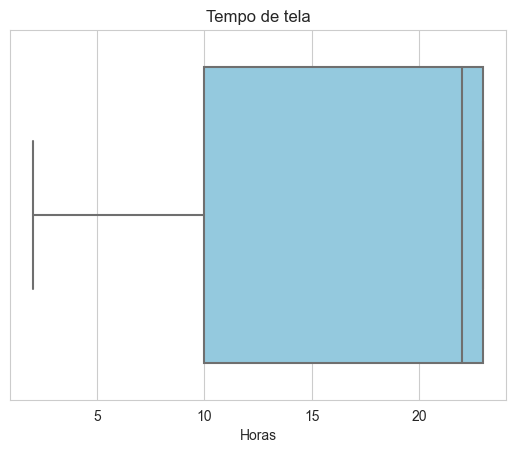

In [19]:
# definir estilo do gráfico
sns.set_style("whitegrid")

# criar boxplot e adicionar títulos e rótulos
ax = sns.boxplot(x=df_v2['screentime'], color="skyblue")
ax.set_title("Tempo de tela")
ax.set_xlabel("Horas")

# adicionar pontos para os outliers
outliers = df_v2[df_v2['screentime'] > df_v2['screentime'].quantile(0.75) + 1.5*(df_v2['screentime'].quantile(0.75) - df_v2['screentime'].quantile(0.25))]
for i, outlier in outliers.iterrows():
    ax.plot(1, outlier['screentime'], 'ro', markersize=8)

# mostrar gráfico
plt.show()

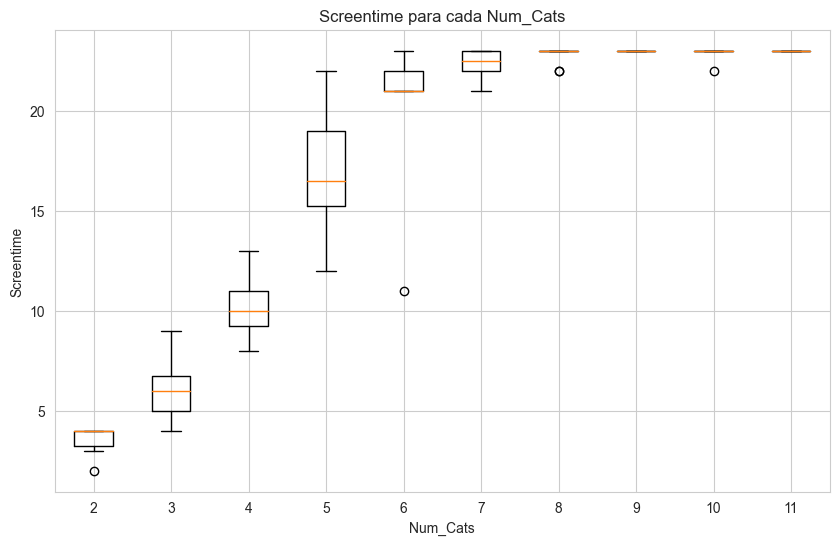

In [20]:
# Agrupe o dataframe por num_cats e selecione a coluna screentime
grouped = df_v2.groupby('num_cats')['screentime']

# Crie o boxplot
plt.figure(figsize=(10,6))
plt.boxplot([grouped.get_group(num_cat) for num_cat in grouped.groups.keys()])
plt.xlabel('Num_Cats')
plt.ylabel('Screentime')
plt.title('Screentime para cada Num_Cats')

# Adicione rótulos personalizados para cada boxplot
labels = grouped.groups.keys()
plt.xticks(range(1, len(labels) + 1), labels)

plt.show()

# Conclusões


Ao analisar os dois approaches, podemos ver que não houve tantas mudanças na performance dos códigos com a aplicação da aleatorização. Em questão de tempo de execução, a abordagem gulosa parece ser mais rápida em execução, mas em screentime a abordagem com aleatoriedade ganha.

____
# Método Exaustivo

Até agora experimentamos heurísticas que buscaram resolver o nosso problema em um tempo razoável, sem garantias de otimalidade. Em seguida, chegou o momento em incorporar o paralelismo de tarefas em nossas alternativas de resolução.

Para isso, foi implementado uma versão exaustiva da implementação, onde todas as possbilidades de filmes são testadas em busca da solução ótima. Abaixo temos um breve resumo de cada algoritmo e o link do github onde pode-se encontrar o código. 

### Versão Exaustiva

1. Inicialmente, temos a inclusão de várias bibliotecas padrão C++, como <iostream> para entrada/saída, <algorithm> e <vector> para manipulação de dados em containers, <chrono> para manipulação de tempo, e <cmath> para operações matemáticas.

2. Uma estrutura de dados, Movie, é definida para armazenar as informações relevantes para cada filme: o tempo de início, o tempo final e a categoria do filme.

3. A função generatePossibilities é usada para gerar todas as possíveis combinações de filmes. Isso é feito iterando sobre todos os subconjuntos possíveis do vetor de filmes, onde o número de subconjuntos é 2^n (n é o número de filmes). Isso é implementado usando manipulação de bits: cada subconjunto é representado por um número inteiro, onde o bit na posição j representa se o filme j está incluído no subconjunto ou não.

4. Na função main, a entrada é lida primeiro. O número de filmes e o número de categorias são lidos do usuário, seguidos pelos limites de filmes que podem ser assistidos para cada categoria e, finalmente, os detalhes de cada filme.

5. Depois que todas as possibilidades são geradas, o código então itera sobre todas essas possibilidades para encontrar a melhor combinação de filmes que maximiza o número total de filmes assistidos e o tempo total de tela. Isso é feito mantendo um vetor de booleanos schedule para marcar quais horas do dia já foram alocadas para assistir um filme, e um vetor currentQnt_per_category para controlar quantos filmes de cada categoria já foram assistidos.

6. Se um filme selecionado pode ser assistido (ou seja, o horário de exibição não entra em conflito com os filmes já alocados e a quantidade máxima de filmes dessa categoria ainda não foi atingida), então esse filme é adicionado ao cronograma e as variáveis relevantes são atualizadas.

7. Finalmente, o código imprime o número total de filmes que podem ser assistidos na melhor combinação encontrada.

Este código implementa uma busca exaustiva de todas as possibilidades, o que é bastante ineficiente e pode se tornar rapidamente inviável à medida que o número de filmes aumenta, devido à complexidade exponencial. Assim, foi utilizado a biblioteca OpenMP para tentar melhorar o desempenho usando paralelização. 

[Link do código para o github](https://github.com/Paulokim1/SuperComp--Projeto/blob/main/mains/main_exaust.cpp)

### Versão Exaustiva com OpenMP


Este código é uma versão otimizada do código anterior, que também busca a melhor combinação de filmes para maximizar o número de filmes assistidos e o tempo total de exibição. As otimizações feitas aqui envolvem a paralelização de partes do código que podem ser executadas simultaneamente em diferentes threads, o que pode acelerar significativamente a execução em um computador com vários núcleos de processador.

Vamos analisar as principais mudanças:

1. A primeira mudança notável é a inclusão da biblioteca <omp.h>, que fornece funções para paralelização usando OpenMP, uma API para programação paralela em C/C++.

2. Na função generatePossibilities, a geração de todas as possíveis combinações de filmes é paralelizada usando a diretiva #pragma omp parallel for. Isso divide o loop entre várias threads, permitindo que várias combinações sejam geradas simultaneamente. A diretiva #pragma omp critical é usada para garantir que apenas uma thread de cada vez execute o código de inserir a combinação atual na lista de todas as combinações, evitando assim condições de corrida.

3. Na função main, a iteração sobre todas as combinações possíveis de filmes também é paralelizada. Cada thread mantém sua própria variável maxAns para rastrear a melhor combinação que encontrou.

4. Após a conclusão do loop paralelo, o código itera sobre todos os maxAns de cada thread para encontrar o máximo global. Isso substitui a necessidade de atualizar maxAns e maxScreenTime durante o loop principal, o que exigiria sincronização e poderia ser uma fonte significativa de contenção entre threads.

5. Essas otimizações podem tornar o código muito mais rápido em um computador com vários núcleos, pois a geração de combinações e a busca pela melhor combinação são ambas tarefas intensivas em CPU que podem ser aceleradas significativamente pela paralelização.

No entanto, deve-se notar que este código ainda tem complexidade exponencial e pode ser inviável para um grande número de filmes, apesar da paralelização. Além disso, o uso de OpenMP pode não ser suportado em todas as plataformas e compiladores. Para casos grandes e/ou execução em plataformas sem suporte para OpenMP, ainda pode ser aconselhável considerar outras otimizações ou abordagens algorítmicas. Portanto, partimos para o uso da GPU.

[Link do código para o github](https://github.com/Paulokim1/SuperComp--Projeto/blob/main/mains/main_exaust_openMP.cpp)

### Versão Exaustiva com Thrust

Este código é uma versão altamente otimizada do código anterior, que utiliza a biblioteca Thrust para executar cálculos na GPU em vez da CPU. A Thrust é uma biblioteca para CUDA que fornece uma interface de alto nível para programação de GPU que se assemelha à STL (Standard Template Library) do C++.

A principal diferença entre este código e os anteriores é que a geração de todas as combinações de filmes e a busca pela melhor combinação são realizadas na GPU, que é capaz de executar milhares de threads simultaneamente.

Vamos detalhar as partes importantes do código:

1. O código inclui várias bibliotecas da Thrust. A Thrust fornece vetores de host e de dispositivo (essencialmente, vetores que vivem na memória da CPU e da GPU, respectivamente), além de uma série de algoritmos paralelos semelhantes aos da STL.

2. A estrutura getMovieCount foi definida com o operador de função call ( ) sobrecarregado. Esta estrutura é chamada como uma função durante a transformação da Thrust. Ela recebe um número de filme e retorna o número de filmes que podem ser assistidos para essa combinação, com base nas restrições de horário e categoria.

3. O código lê as categorias e os filmes como antes, mas os armazena em vetores de host da Thrust. Em seguida, ele copia esses vetores para vetores de dispositivo, que vivem na memória da GPU.

4. Em seguida, o código cria um vetor de dispositivo possibility_d que representa todas as combinações possíveis de filmes. Ele usa a função thrust::sequence para preencher esse vetor com uma sequência de números de 0 a 2^n - 1.

5. A função thrust::transform é então usada para substituir cada número de combinação em possibility_d pelo número de filmes que podem ser assistidos para essa combinação. A função é executada na GPU e pode processar várias combinações simultaneamente.

6. Finalmente, o código usa thrust::max_element para encontrar a melhor combinação, que é a que tem o maior número de filmes que podem ser assistidos.

Esse código tem uma série de vantagens de desempenho em relação aos anteriores. A mais significativa é que ele utiliza a enorme capacidade de processamento paralelo de uma GPU para gerar e avaliar combinações de filmes. Isso pode resultar em uma aceleração substancial em relação a uma implementação apenas na CPU. 

[Link do código para o github](https://github.com/Paulokim1/SuperComp--Projeto/blob/main/mains/main_exaust_thrust.cu)

## Resultados

<img src = "exaustive_method_result.png">

<img src="results_graph.png" width="1000">

Na imagem acima, podemos observar uma melhora ao implementarmos o OpenMP. Mas o salto foi muito maior ao utilizarmos a GPU com a biblioteca thrust, o que nos mostrou que o uso da paralelização via placa de vídeo demonstrou o melhor resultado na questão de tempo de execução. 

Segue a seguir o link para o Google Colab onde todos os algoritmos foram compilados e executados, incluindo o texto que foi utilizado para a execução destes. [Link](https://colab.research.google.com/drive/1JhqekRKEgh_tbbACd7-IPWcnLGqxFKgC?usp=sharing)